Câu 1: 
Đánh giá mức độ đạt target doanh số theo ngành hàng và theo quản lí ngành hàng trong 3 tháng (4,5,6). Cho nhận xét

Yêu cầu: 
1. Sử dụng bảng biểu, chart phù hợp để thể hiện đánh giá 

2. Nguồn data sử dụng

-Sheet Data 2- Doanh số bán-trên excel
-Target- BI TEST- Google sheet  (lấy source vào)

https://docs.google.com/spreadsheets/d/e/2PACX-1vTEEne8cFoBE7fjE3oGhatlzaHe6cVup1lX-nfhchw4aVNRNocPaTJtZdy9aEMQ0lRFGUJmOdjGTUIU/pubhtml

3. Sử dụng Power pivot xử lý , KHÔNG sử dụng excel thông thường


Câu 2: 
 Biết data tại thời điểm ngày 12/7. Đưa ra nhận xét về tồn kho theo sản phẩm, nhóm ngành hàng. Dự đoán đến cuối tháng 7, có cần thực hiện hành động  gì để đảm bảo cân đối  lượng trữ tồn hay không. Nếu có, cho ví dụ.
Yêu cầu: 
1. Sử dụng bảng biểu, chart phù hợp 
2. Nguồn data sử dụng:  Data  1 - Tồn kho trong tháng 7 -trên excel
3. Trong dữ liệu có một số sản phẩm được xếp không đúng nhóm hàng, sử dụng Power Query hiệu chỉnh dữ liệu)
(Không sửa trực tiếp vào dữ liệu)
4. Sử dụng excel hoặc power pivot



# CellphoneS Data Analyst Test
#### Question 1:
##### Đánh giá mức độ đạt target doanh số theo ngành hàng và theo quản lí ngành hàng trong 3 tháng (4,5,6). Cho nhận xét
#### Yêu cầu: 
1. Sử dụng bảng biểu, chart phù hợp để thể hiện đánh giá 

2. Nguồn data sử dụng
- Sheet Data 2- Doanh số bán-trên excel
- Target- BI TEST- Google sheet  (lấy source vào)
https://docs.google.com/spreadsheets/d/e/2PACX-1vTEEne8cFoBE7fjE3oGhatlzaHe6cVup1lX-nfhchw4aVNRNocPaTJtZdy9aEMQ0lRFGUJmOdjGTUIU/pubhtml

3. Sử dụng Power pivot xử lý , KHÔNG sử dụng excel thông thường

#### Question 2: 
##### Biết data tại thời điểm ngày 12/7. Đưa ra nhận xét về tồn kho theo sản phẩm, nhóm ngành hàng. Dự đoán đến cuối tháng 7, có cần thực hiện hành động  gì để đảm bảo cân đối  lượng trữ tồn hay không. Nếu có, cho ví dụ.

#### Yêu cầu: 
1. Sử dụng bảng biểu, chart phù hợp 
2. Nguồn data sử dụng:  Data  1 - Tồn kho trong tháng 7 -trên excel
3. Trong dữ liệu có một số sản phẩm được xếp không đúng nhóm hàng, sử dụng Power Query hiệu chỉnh dữ liệu


## 1.Import Libraries


In [90]:
# Import Libraries
import pandas as pd 
from matplotlib import pyplot as plt
import plotly
import numpy as np
import seaborn as sns

## 2. Load data from multiple sources to DataFrame 
### 2.1 Load Target table to DataFrame 


In [352]:
# Load the target table to dataframe
target_url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vTEEne8cFoBE7fjE3oGhatlzaHe6cVup1lX-nfhchw4aVNRNocPaTJtZdy9aEMQ0lRFGUJmOdjGTUIU/pubhtml"
# Clean the dataframe, remove error in unicode text and remove index column
target_df = pd.read_html(target_url, encoding='utf-8', header = 1)[0]
target_df = target_df.drop(columns=['1'])
target_df

,Ngành hàng,PIC,2020.06,2020.05,2020.04
0,APPLE WATCH CŨ,NAM,572795786,486803656,717954926
1,ASUS CŨ,MINH,53112576,54013420,56085343
2,HONOR CŨ,MINH,12260144,10100555,12463662
3,HUAWEI CŨ,MINH,237550195,213285982,275603191
4,IPAD CŨ,NAM,2567100223,1905156062,2104314504
5,IPHONE CŨ,NAM,33417795452,37204978580,35383071284
6,KHÁC CŨ,MINH,21775228,24491815,26574489
7,MACBOOK CŨ,NAM,453181769,404372436,446880582
8,NOKIA CŨ,LAN,174669087,140254989,118264963
9,OPPO CŨ,LAN,339789626,292415890,305320628


#### 2.2 Load Inventory Data : TỒN KHO THÁNG 7

In [354]:
inventory_df = pd.read_excel("test.xlsx",sheet_name = "DATA 1 - TỒN KHO THÁNG 7",)
inventory_df.head()

,Danh mục,Tên sản phẩm,Tồn có thể bán,Giá bán,Số bán hôm qua,Số bán 3 ngày qua,Số bán 7 ngày qua,Số nhập hôm qua,Số nhập 7 ngày qua
0,IPHONE CŨ,Apple iPhone XS Max 64GB Cũ,154.0,15000000.0,15.0,42.0,101.0,16.0,31.0
1,IPHONE CŨ,Apple iPhone XS 64GB Cũ,85.0,12400000.0,5.0,20.0,42.0,29.0,55.0
2,IPHONE CŨ,APPLE IPHONE 8 64GB VÀNG CŨ - ĐẸP,101.0,6400000.0,5.0,16.0,35.0,4.0,4.0
3,IPHONE CŨ,iPhone 11 128GB Cũ,59.0,17000000.0,2.0,9.0,21.0,NaN,NaN
4,IPHONE CŨ,Apple iPhone XS Max 256GB Cũ,41.0,16400000.0,2.0,4.0,15.0,NaN,16.0


#### Clean data by dealing with Null value. 
Trước khi Analyst một bộ dữ liệu trước tiên ta cần kiểm tra xem có tồn tại các hàng dữ liệu bị mất một vài giá trị hay không?

In [1]:
inventory_df.isnull().sum()

NameError: name 'inventory_df' is not defined

Ở đây ta thấy có 4 cột chứa dữ liệu Null: Số bán 3 ngày qua,Số bán 7 ngày qua,Số nhập hôm qua và số nhập 7 ngày qua. 

Để xử lí các kiểu dữ liệu bị thiếu này, ta có 2 phương án chính là xóa bỏ cột, hàng có nhiều Null values hoặc là thay thế Null bằng một giá trị nào đó.

Ở trường hợp này ta sẽ chọn phương án thay Null values bằng 0. Vì số sản phẩm nhập và bán của các ngày không có giá trị có nghĩa là 
bằng 0 là hợp lí.
 

In [122]:
# Clean data by dealing with Null value. 
# inventory_df['Tồn có thể bán'].fillna(0,inplace = True)

# inventory_df.iloc[2:,:].fillna(0,inplace = True)
fill_values = {'Tồn có thể bán':0, 'Giá bán':0,'Số bán hôm qua':0 ,'Số bán hôm qua':0 ,'Số bán 3 ngày qua':0, 'Số bán 7 ngày qua':0,'Số nhập hôm qua':0,'Số nhập 7 ngày qua':0 }

inventory_df.fillna(fill_values, inplace =True)
inventory_df.head()

,Danh mục,Tên sản phẩm,Tồn có thể bán,Giá bán,Số bán hôm qua,Số bán 3 ngày qua,Số bán 7 ngày qua,Số nhập hôm qua,Số nhập 7 ngày qua
0,IPHONE CŨ,Apple iPhone XS Max 64GB Cũ,154.0,15000000.0,15.0,42.0,101.0,16.0,31.0
1,IPHONE CŨ,Apple iPhone XS 64GB Cũ,85.0,12400000.0,5.0,20.0,42.0,29.0,55.0
2,IPHONE CŨ,APPLE IPHONE 8 64GB VÀNG CŨ - ĐẸP,101.0,6400000.0,5.0,16.0,35.0,4.0,4.0
3,IPHONE CŨ,iPhone 11 128GB Cũ,59.0,17000000.0,2.0,9.0,21.0,0.0,0.0
4,IPHONE CŨ,Apple iPhone XS Max 256GB Cũ,41.0,16400000.0,2.0,4.0,15.0,0.0,16.0


#### 2.3 Load Revenue Data

In [355]:
revenue_df = pd.read_excel("test.xlsx",sheet_name = "DATA 2 - DOANH SỐ BÁN" )
revenue_df.iloc[:,:]

,Danh mục,Giá bán bình quân,Doanh số tháng 6,Doanh số tháng 5,Doanh số tháng 4
0,IPHONE CŨ,11845000.0,3.501120e+10,3.018400e+10,3.421152e+10
1,IPAD CŨ,8625000.0,2.318400e+09,1.344000e+09,1.572480e+09
2,SAMSUNG CŨ,10695000.0,2.934400e+09,2.262400e+09,3.334400e+09
3,VSMART CŨ,2645000.0,2.128000e+08,2.240000e+08,2.195200e+08
4,OPPO CŨ,6440000.0,3.584000e+08,2.128000e+08,2.085440e+08
5,NOKIA CŨ,2990000.0,1.456000e+08,2.240000e+08,2.195200e+08
6,XIAOMI CŨ,4830000.0,3.920000e+08,3.360000e+08,3.292800e+08
7,HUAWEI CŨ,7820000.0,2.464000e+08,1.904000e+08,2.419200e+08
8,APPLE WATCH CŨ,7935000.0,6.384000e+08,7.616000e+08,7.660800e+08
9,REALME CŨ,4140000.0,2.016000e+08,2.128000e+08,3.830400e+08


## 3. Clean Data 

## 3. Analyst Data
### 3.1 Đánh giá mức độ đạt target doanh số theo ngành hàng và theo quản lí ngành hàng trong 3 tháng (4,5,6)
#### 3.1.1 (Join 2 Table) Kết hợp 2 bảng để lấy tất cả dữ liệu về cả target và cả số liệu kinh doanh thực tế của cả 3 tháng (4,5,6)


In [290]:
df = pd.merge(target_df,revenue_df,how = 'inner',left_on='Ngành hàng', right_on='Danh mục')

df1=df.drop(columns = 'Danh mục')
df1

,Ngành hàng,PIC,2020.06,2020.05,2020.04,Giá bán bình quân,Doanh số tháng 6,Doanh số tháng 5,Doanh số tháng 4
0,APPLE WATCH CŨ,NAM,572795786,486803656,717954926,7935000.0,6.384000e+08,7.616000e+08,7.660800e+08
1,ASUS CŨ,MINH,53112576,54013420,56085343,13225000.0,5.600000e+07,1.792000e+08,4.233600e+08
2,HONOR CŨ,MINH,12260144,10100555,12463662,10000000.0,1.120000e+07,8.000000e+06,2.240000e+07
3,HUAWEI CŨ,MINH,237550195,213285982,275603191,7820000.0,2.464000e+08,1.904000e+08,2.419200e+08
4,IPAD CŨ,NAM,2567100223,1905156062,2104314504,8625000.0,2.318400e+09,1.344000e+09,1.572480e+09
5,IPHONE CŨ,NAM,33417795452,37204978580,35383071284,11845000.0,3.501120e+10,3.018400e+10,3.421152e+10
6,KHÁC CŨ,MINH,21775228,24491815,26574489,1955000.0,2.240000e+07,1.120000e+07,4.032000e+07
7,MACBOOK CŨ,NAM,453181769,404372436,446880582,27945000.0,4.480000e+08,1.904000e+08,2.004000e+08
8,NOKIA CŨ,LAN,174669087,140254989,118264963,2990000.0,1.456000e+08,2.240000e+08,2.195200e+08
9,OPPO CŨ,LAN,339789626,292415890,305320628,6440000.0,3.584000e+08,2.128000e+08,2.085440e+08


#### Các chỉ số thống kê liên quan đến bảng dữ liệu

In [291]:
df1.describe()

,2020.06,2020.05,2020.04,Giá bán bình quân,Doanh số tháng 6,Doanh số tháng 5,Doanh số tháng 4
count,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01
mean,3.025637e+09,3.199436e+09,3.085287e+09,8.649286e+06,3.071200e+09,2.595771e+09,3.012342e+09
std,8.812018e+09,9.826288e+09,9.337699e+09,6.583056e+06,9.235300e+09,7.964609e+09,9.022374e+09
min,1.226014e+07,1.010056e+07,1.246366e+07,1.955000e+06,1.120000e+07,8.000000e+06,2.240000e+07
25%,1.840689e+08,1.558825e+08,1.283098e+08,4.312500e+06,1.596000e+08,1.904000e+08,2.112880e+08
50%,2.886699e+08,2.543247e+08,2.904619e+08,7.877500e+06,3.024000e+08,2.184000e+08,2.856000e+08
75%,5.428923e+08,5.021475e+08,6.501863e+08,1.052125e+07,5.908000e+08,6.552000e+08,6.804000e+08
max,3.341780e+10,3.720498e+10,3.538307e+10,2.794500e+07,3.501120e+10,3.018400e+10,3.421152e+10


Ta có thể thấy,

In [170]:
# Theo ngành hàng và theo PIC 
#  so sánh doanh số tháng 456  với target tháng 456
# month_4_df = df1[['Ngành hàng','2020.04','Doanh số tháng 4']]
# month_4_df.head(5)
df1


,Ngành hàng,PIC,2020.06,2020.05,2020.04,Giá bán bình quân,Doanh số tháng 6,Doanh số tháng 5,Doanh số tháng 4
0,APPLE WATCH CŨ,NAM,572795786,486803656,717954926,7935000.0,6.384000e+08,7.616000e+08,7.660800e+08
1,ASUS CŨ,MINH,53112576,54013420,56085343,13225000.0,5.600000e+07,1.792000e+08,4.233600e+08
2,HONOR CŨ,MINH,12260144,10100555,12463662,10000000.0,1.120000e+07,8.000000e+06,2.240000e+07
3,HUAWEI CŨ,MINH,237550195,213285982,275603191,7820000.0,2.464000e+08,1.904000e+08,2.419200e+08
4,IPAD CŨ,NAM,2567100223,1905156062,2104314504,8625000.0,2.318400e+09,1.344000e+09,1.572480e+09
5,IPHONE CŨ,NAM,33417795452,37204978580,35383071284,11845000.0,3.501120e+10,3.018400e+10,3.421152e+10
6,KHÁC CŨ,MINH,21775228,24491815,26574489,1955000.0,2.240000e+07,1.120000e+07,4.032000e+07
7,MACBOOK CŨ,NAM,453181769,404372436,446880582,27945000.0,4.480000e+08,1.904000e+08,2.004000e+08
8,NOKIA CŨ,LAN,174669087,140254989,118264963,2990000.0,1.456000e+08,2.240000e+08,2.195200e+08
9,OPPO CŨ,LAN,339789626,292415890,305320628,6440000.0,3.584000e+08,2.128000e+08,2.085440e+08


In [171]:
df1.dtypes

Ngành hàng            object
PIC                   object
2020.06                int64
2020.05                int64
2020.04                int64
Giá bán bình quân    float64
Doanh số tháng 6     float64
Doanh số tháng 5     float64
Doanh số tháng 4     float64
dtype: object

In [288]:
# Retype column for analysis
convert_type = {'Ngành hàng':object,'2020.04':float ,'2020.05':float, '2020.06':float ,'Doanh số tháng 4':float}

df1 = df1.astype(convert_type)
df1.dtypes
df1

,Ngành hàng,PIC,2020.06,2020.05,2020.04,Giá bán bình quân,Doanh số tháng 6,Doanh số tháng 5,Doanh số tháng 4,Month,Target Revenue
0,APPLE WATCH CŨ,NAM,5.727958e+08,4.868037e+08,7.179549e+08,7935000.0,6.384000e+08,7.616000e+08,7.660800e+08,4,7.179549e+08
1,ASUS CŨ,MINH,5.311258e+07,5.401342e+07,5.608534e+07,13225000.0,5.600000e+07,1.792000e+08,4.233600e+08,4,5.608534e+07
2,HONOR CŨ,MINH,1.226014e+07,1.010056e+07,1.246366e+07,10000000.0,1.120000e+07,8.000000e+06,2.240000e+07,4,1.246366e+07
3,HUAWEI CŨ,MINH,2.375502e+08,2.132860e+08,2.756032e+08,7820000.0,2.464000e+08,1.904000e+08,2.419200e+08,4,2.756032e+08
4,IPAD CŨ,NAM,2.567100e+09,1.905156e+09,2.104315e+09,8625000.0,2.318400e+09,1.344000e+09,1.572480e+09,4,2.104315e+09
5,IPHONE CŨ,NAM,3.341780e+10,3.720498e+10,3.538307e+10,11845000.0,3.501120e+10,3.018400e+10,3.421152e+10,4,3.538307e+10
6,KHÁC CŨ,MINH,2.177523e+07,2.449182e+07,2.657449e+07,1955000.0,2.240000e+07,1.120000e+07,4.032000e+07,4,2.657449e+07
7,MACBOOK CŨ,NAM,4.531818e+08,4.043724e+08,4.468806e+08,27945000.0,4.480000e+08,1.904000e+08,2.004000e+08,4,4.468806e+08
8,NOKIA CŨ,LAN,1.746691e+08,1.402550e+08,1.182650e+08,2990000.0,1.456000e+08,2.240000e+08,2.195200e+08,4,1.182650e+08
9,OPPO CŨ,LAN,3.397896e+08,2.924159e+08,3.053206e+08,6440000.0,3.584000e+08,2.128000e+08,2.085440e+08,4,3.053206e+08


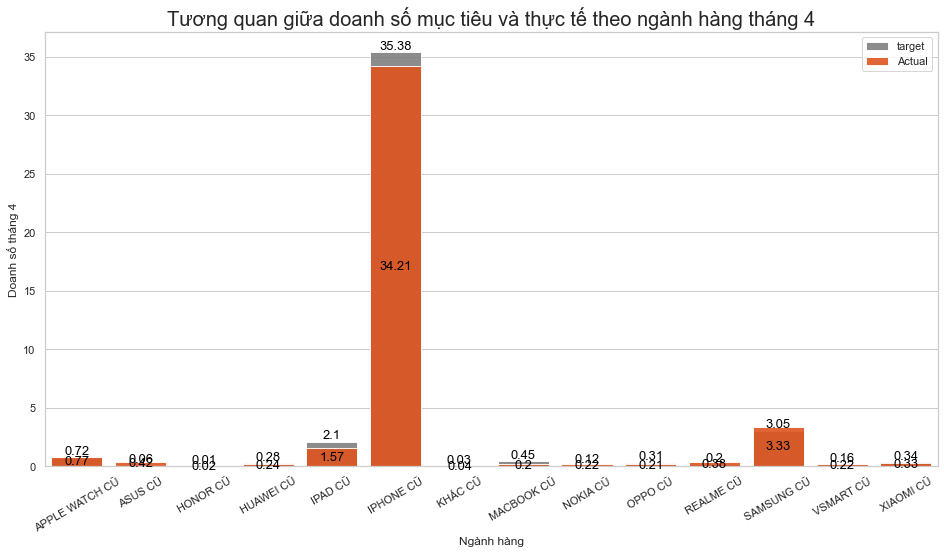

In [195]:
sns.set_theme(style = 'whitegrid', rc = {'figure.figsize': (16,8)})

ax1 = sns.barplot(data = df1, x ='Ngành hàng', y= round(df1['2020.04']/1000000000, 2) , color ='grey', edgecolor = 'w', label = 'target', alpha =0.9 )
ax1.bar_label(ax1.containers[0], label_type = 'edge', color = 'black', size = 13)
ax1.tick_params(axis='x', rotation=30)

ax1.set_title("Tương quan giữa doanh số mục tiêu và thực tế theo ngành hàng tháng 4", size =20);

ax2 = sns.barplot(data = df1, x ='Ngành hàng', y= round(df1['Doanh số tháng 4']/1000000000,2 ) , color ='orangered',label = 'Actual', alpha =0.9 )
ax2.bar_label(ax2.containers[1], label_type = 'center', color = 'black', size = 13);
ax1.legend()



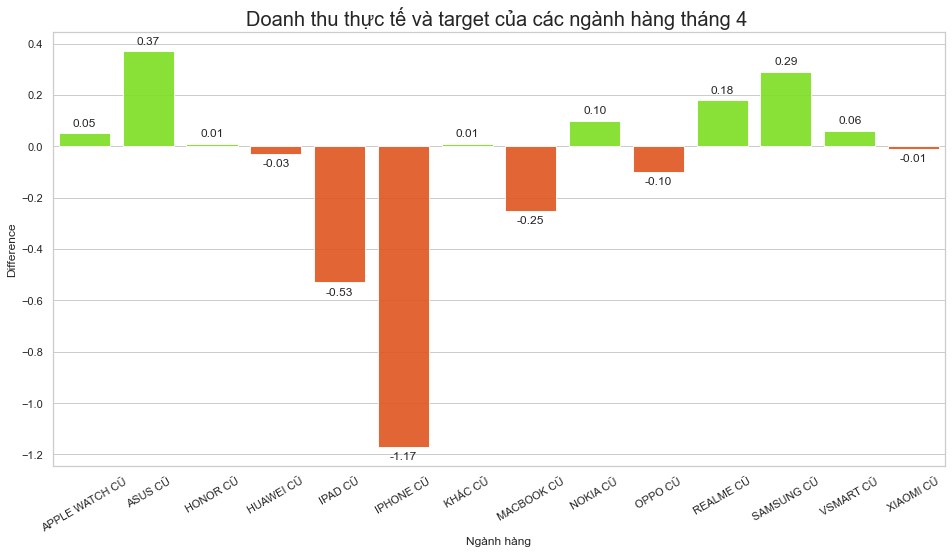

In [249]:
sns.set_theme(context='notebook',style = 'whitegrid', rc= {'figure.figsize':(16,8)})
#actual - target
diff = df['Doanh số tháng 4']/1000000000 - df['2020.04']/1000000000

# Set the color palette for the plot
colors = ['orangered' if x < 0 else 'lawngreen' for x in diff]
palette = sns.set_palette(sns.color_palette(colors))


ax = sns.barplot(x='Ngành hàng', y=df['Difference'] , data=df, palette = palette, alpha =.9)
ax.set_title("Doanh thu thực tế và target của các ngành hàng tháng 4 ", size = 20)
ax.tick_params(axis='x', rotation=30, )

# Add labels to the bars

ax.bar_label(ax.containers[0], label_type='edge', labels=[f"{v:.2f}" for v in diff], fontsize=12, padding=5);




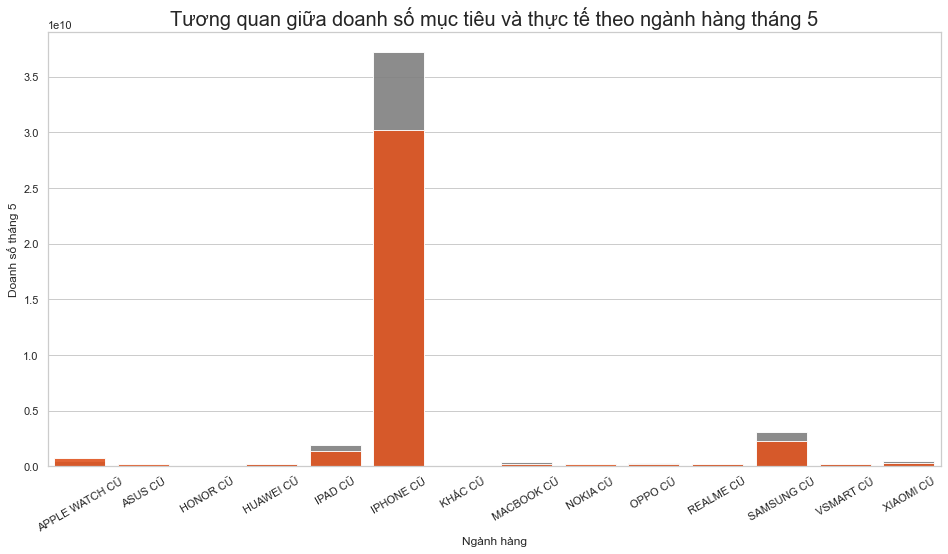

In [179]:
sns.set_theme(style = 'whitegrid', rc = {'figure.figsize': (16,8)})

ax1 = sns.barplot(data = df1, x ='Ngành hàng', y= '2020.05', color ='grey', edgecolor = 'w', label = 'target', alpha =0.9 )
# ax1.bar_label(ax1.containers[0], label_type = 'center', color = 'white', size = 15)
ax1.tick_params(axis='x', rotation=30)

ax1.set_title("Tương quan giữa doanh số mục tiêu và thực tế theo ngành hàng tháng 5", size =20);

ax2 = sns.barplot(data = df1, x ='Ngành hàng', y= 'Doanh số tháng 5', color ='orangered',label = 'Actual', alpha =0.9 )

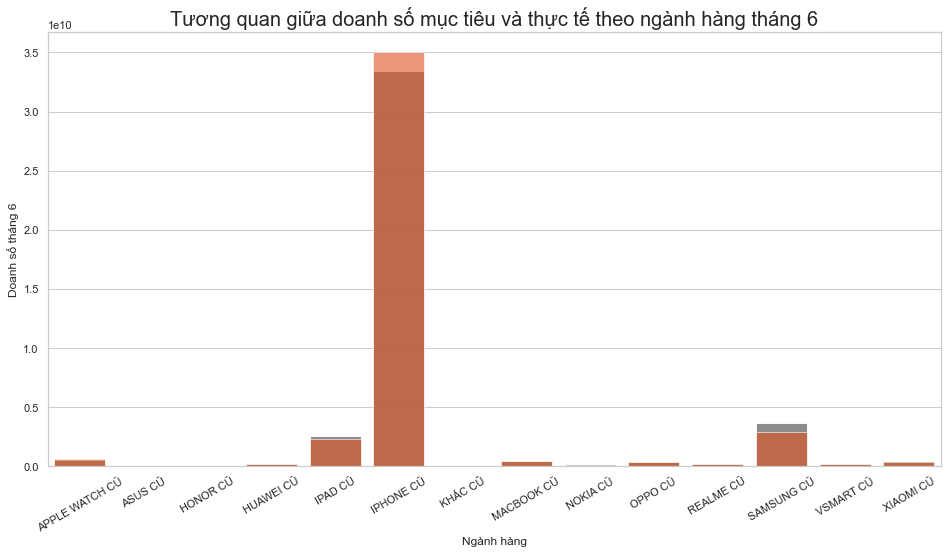

In [180]:
sns.set_theme(style = 'whitegrid', rc = {'figure.figsize': (16,8)})

ax1 = sns.barplot(data = df1, x ='Ngành hàng', y= '2020.06', color ='grey', edgecolor = 'w', label = 'target', alpha =0.9 )
# ax1.bar_label(ax1.containers[0], label_type = 'center', color = 'white', size = 15)
ax1.tick_params(axis='x', rotation=30)

ax1.set_title("Tương quan giữa doanh số mục tiêu và thực tế theo ngành hàng tháng 6", size =20);

ax2 = sns.barplot(data = df1, x ='Ngành hàng', y= 'Doanh số tháng 6', color ='orangered',label = 'Actual', alpha =0.6 )

In [292]:
# sns.lineplot(data = df1,x=df[['2020.04','2020.05','2020.06']]    ,hue="Ngành hàng" , palette='pastel')

In [298]:
df1

,Ngành hàng,PIC,2020.06,2020.05,2020.04,Giá bán bình quân,Doanh số tháng 6,Doanh số tháng 5,Doanh số tháng 4
0,APPLE WATCH CŨ,NAM,572795786,486803656,717954926,7935000.0,6.384000e+08,7.616000e+08,7.660800e+08
1,ASUS CŨ,MINH,53112576,54013420,56085343,13225000.0,5.600000e+07,1.792000e+08,4.233600e+08
2,HONOR CŨ,MINH,12260144,10100555,12463662,10000000.0,1.120000e+07,8.000000e+06,2.240000e+07
3,HUAWEI CŨ,MINH,237550195,213285982,275603191,7820000.0,2.464000e+08,1.904000e+08,2.419200e+08
4,IPAD CŨ,NAM,2567100223,1905156062,2104314504,8625000.0,2.318400e+09,1.344000e+09,1.572480e+09
5,IPHONE CŨ,NAM,33417795452,37204978580,35383071284,11845000.0,3.501120e+10,3.018400e+10,3.421152e+10
6,KHÁC CŨ,MINH,21775228,24491815,26574489,1955000.0,2.240000e+07,1.120000e+07,4.032000e+07
7,MACBOOK CŨ,NAM,453181769,404372436,446880582,27945000.0,4.480000e+08,1.904000e+08,2.004000e+08
8,NOKIA CŨ,LAN,174669087,140254989,118264963,2990000.0,1.456000e+08,2.240000e+08,2.195200e+08
9,OPPO CŨ,LAN,339789626,292415890,305320628,6440000.0,3.584000e+08,2.128000e+08,2.085440e+08


Chỉnh sửa lại bảng cho dễ phân tích bằng cách sắp xếp lại số liệu cho phù hợp. Một cột Month sẽ được tạo thêm để lưu giá trị tháng hoặc có thể là năm để phân tích.


In [319]:

df2 = df1.copy()
# Tạo cột Month bằng 2020-04
df2['Month'] = '2020-04'
# Gán lại các giá trị Target và thực tế của tháng 4 ngược lại vào df 
df2['Target Revenue'] = df2['2020.06']
df2['Actual Revenue'] = df2['Doanh số tháng 4']

df3 = df1.copy()
df3['Month'] = '2020-05'
df3['Target Revenue'] = df3['2020.05']
df3['Actual Revenue'] = df3['Doanh số tháng 5']

df4 = df1.copy()
df4['Month'] = '2020-06'
df4['Target Revenue'] = df4['2020.06']
df4['Actual Revenue'] = df4['Doanh số tháng 6']

#  
df5 = pd.concat([df2,df3,df4], ignore_index=True)
df6 = df5.drop(columns = ['2020.06','2020.05','2020.04','Doanh số tháng 6','Doanh số tháng 5','Doanh số tháng 4'])
df6.shape

(42, 6)

In [322]:
df6.head()

,Ngành hàng,PIC,Giá bán bình quân,Month,Target Revenue,Actual Revenue
0,APPLE WATCH CŨ,NAM,7935000.0,2020-04,572795786,7.660800e+08
1,ASUS CŨ,MINH,13225000.0,2020-04,53112576,4.233600e+08
2,HONOR CŨ,MINH,10000000.0,2020-04,12260144,2.240000e+07
3,HUAWEI CŨ,MINH,7820000.0,2020-04,237550195,2.419200e+08
4,IPAD CŨ,NAM,8625000.0,2020-04,2567100223,1.572480e+09


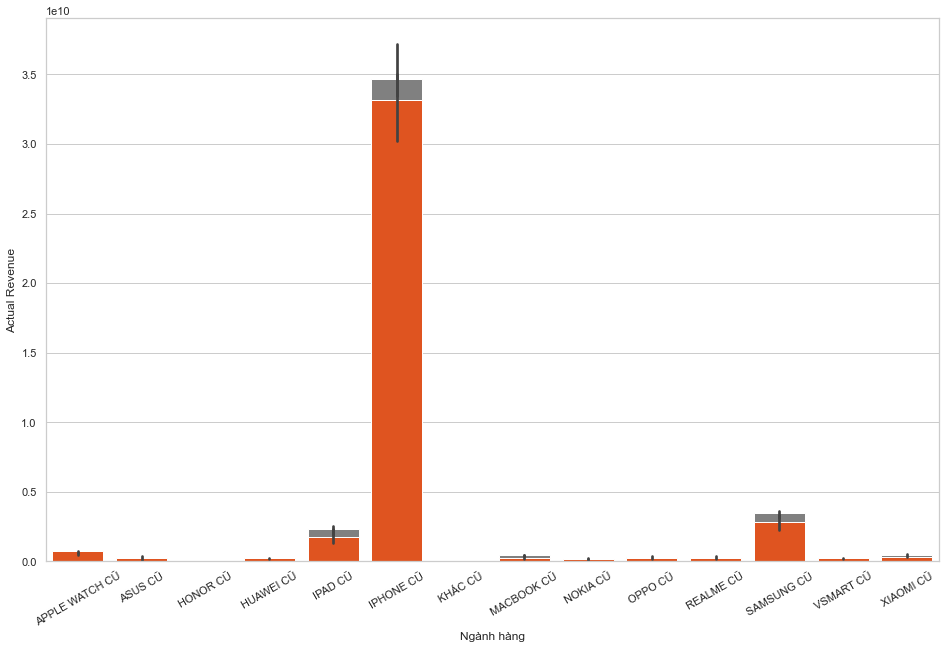

In [343]:
sns.set_theme(style = 'whitegrid',rc={'figure.figsize':(16,10)})
ax = sns.barplot(data= df6,x= 'Ngành hàng', y= 'Target Revenue', color = 'gray')
ax.tick_params(axis ='x',rotation =30)
ax1 = sns.barplot(data= df6,x= 'Ngành hàng', y= 'Actual Revenue',color='orangered')


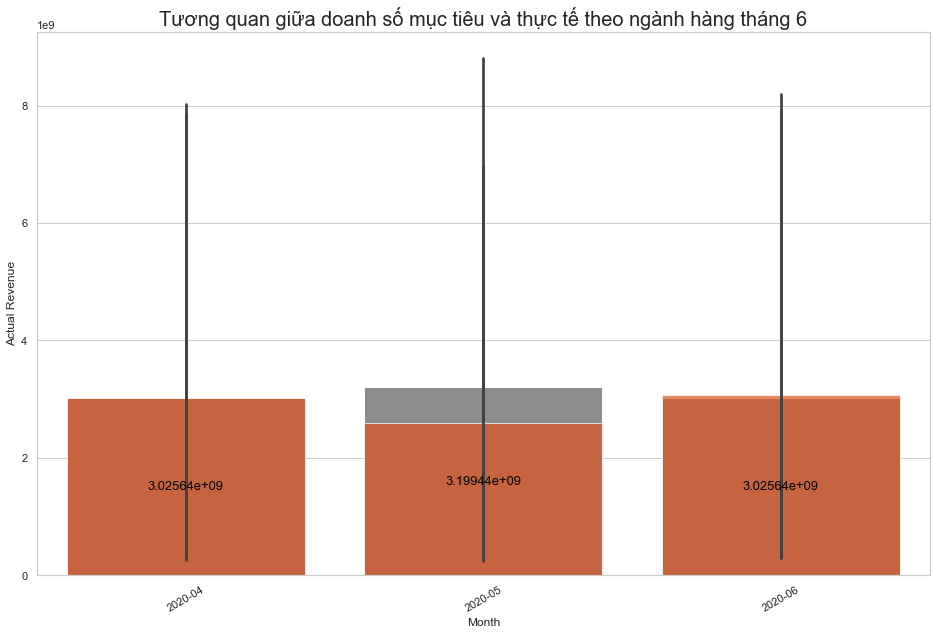

In [351]:
sns.set_theme(style = 'whitegrid',rc={'figure.figsize':(16,10)})
ax = sns.barplot(data= df6,x= 'Month', y= 'Target Revenue', color = 'gray', alpha =0.9)
ax.tick_params(axis ='x',rotation =30)
ax1 = sns.barplot(data= df6,x= 'Month', y= 'Actual Revenue',color='orangered', alpha =0.7)
ax1.set_title("Tương quan giữa doanh số mục tiêu và thực tế theo ngành hàng tháng 6", size =20);
ax1.bar_label(ax1.containers[0], label_type = 'center', color = 'black', size = 13);


In [ ]:
fig = px.line(inventory_df, x='Date', y='Revenue',
              template='plotly_white',
              title='Time Series of Total Sales Revenue (Without Outliers) with Range Slider and Selectors',
              labels={ "Date": "Time Series", "Revenue": "Total Sales Revenue (Millions)"},
              color_discrete_sequence=px.colors.qualitative.D3,
              width = 900, height = 400
                 )

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1 Month", step="month", stepmode="backward"),
            dict(count=6, label="6 Months", step="month", stepmode="backward"),
            dict(count=1, label="1 Year", step="year", stepmode="backward"),
            dict(step='all', label="All Time Series")
        ])))